In [1]:
#@title Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

import io
import pickle

print(f'numpy ver: {np.__version__}')
print(f'pandas ver: {pd.__version__}')
print(f'seaborn ver: {sns.__version__}')

numpy ver: 1.21.6
pandas ver: 1.3.5
seaborn ver: 0.11.2


In [2]:
#@title Считываем файлы Excel в pandas DataFrame
df_bp = pd.read_excel('/content/X_bp.xlsx', index_col = 'Unnamed: 0')
df_nup = pd.read_excel('/content/X_nup.xlsx', index_col = 'Unnamed: 0')
!ls

model.pkl  sample_data	X_bp.xlsx  X_nup.xlsx


In [3]:
#@title Проверяем размерность df_bp и df_nup
print(f'Размерность X_bp.xlsx  {df_bp.shape}')
print(f'Размерность X_nup.xlsx {df_nup.shape}')

Размерность X_bp.xlsx  (1023, 10)
Размерность X_nup.xlsx (1040, 3)


In [4]:
column_bp = df_bp.columns.values.tolist()
print(f'Кол-во столбцов X_bp.xlsx: {len(column_bp)}')
column_nup = df_nup.columns.values.tolist()
print(f'Кол-во столбцов X_nup.xlsx: {len(column_nup)}')

Кол-во столбцов X_bp.xlsx: 10
Кол-во столбцов X_nup.xlsx: 3


In [5]:
# Для повторяемости результатов
RANDOM_STATE = 31415

## Предобработка DataFrame df_bp созданного на основе X_bp.xlsx

In [6]:
#@title Посмотрим на df_bp
df_bp.head(1023)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

In [7]:
#@title Краткая сводка  df_bp
df_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [8]:
#@title Создание описательной статистики df_bp
df_bp.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

In [9]:
#@title Обнаружение пропущенных значений df_bp
df_bp.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [10]:
#@title Обнаружение дубликатов df_bp
duplicateRows_df_bp = df_bp[df_bp.duplicated()]
duplicateRows_df_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 0 entries
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       0 non-null      float64
 1   Плотность, кг/м3                      0 non-null      float64
 2   модуль упругости, ГПа                 0 non-null      float64
 3   Количество отвердителя, м.%           0 non-null      float64
 4   Содержание эпоксидных групп,%_2       0 non-null      float64
 5   Температура вспышки, С_2              0 non-null      float64
 6   Поверхностная плотность, г/м2         0 non-null      float64
 7   Модуль упругости при растяжении, ГПа  0 non-null      float64
 8   Прочность при растяжении, МПа         0 non-null      float64
 9   Потребление смолы, г/м2               0 non-null      float64
dtypes: float64(10)
memory usage: 0.0 bytes


In [11]:
#@title Количество уникальных значений df_bp
df_bp['Соотношение матрица-наполнитель'].value_counts()

1.857143    4
3.532338    2
1.598174    2
2.877358    2
2.919678    2
           ..
4.275325    1
2.908835    1
2.661267    1
3.324730    1
3.808020    1
Name: Соотношение матрица-наполнитель, Length: 1014, dtype: int64

In [12]:
#@title Количество различных элементов на указанной оси
df_bp.nunique(axis = 0)

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [13]:
#@title Среднее значение:
df_bp.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
dtype: float64

In [14]:
#@title Медианное значение:
df_bp.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf9b5f590>,
      dtype=object)

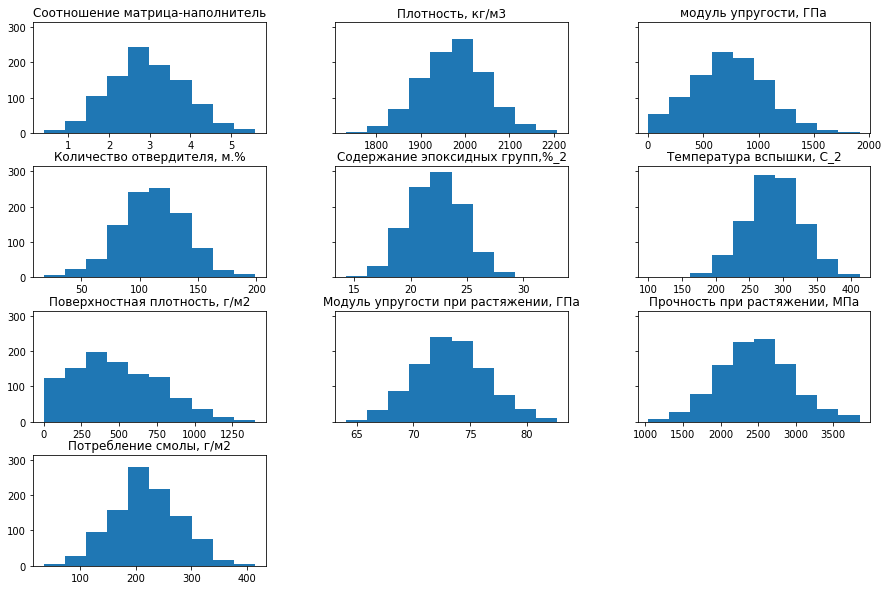

In [15]:
#@title Гистограммы по каждому значению df_bp
df_bp.hist(column = None, grid = False, sharey = True, figsize = (15, 10), layout = None, bins = 10)

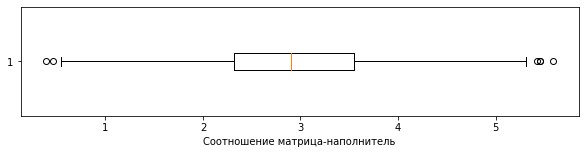

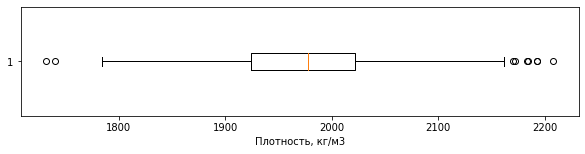

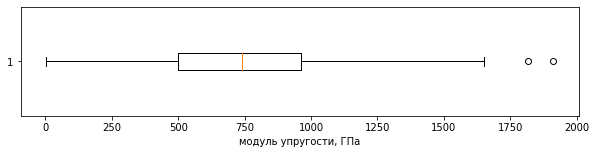

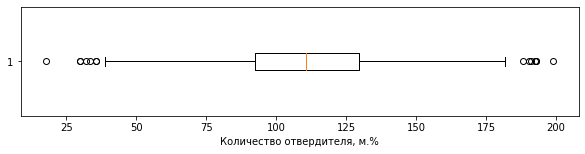

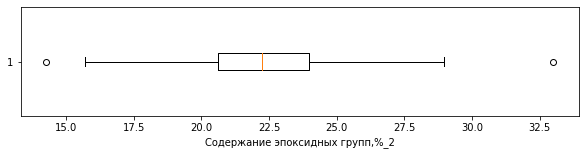

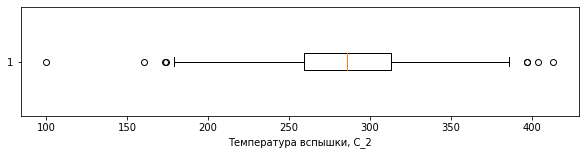

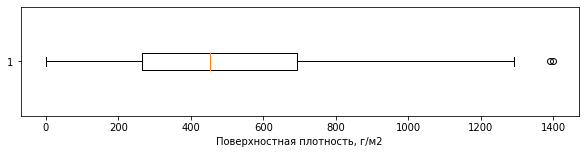

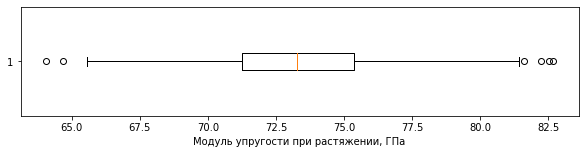

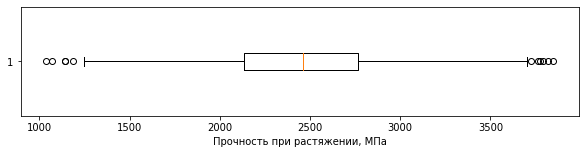

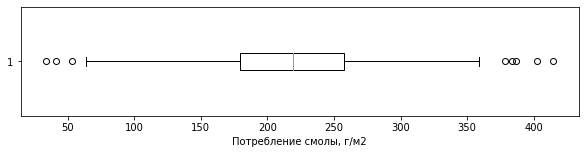

In [16]:
#@title Ящики с усами
for i in range(len(column_bp)):
    plt.figure(figsize=(10, 2))
    plt.boxplot(df_bp[column_bp[i]], vert = False)
    plt.xlabel(column_bp[i])
    plt.show()
    print('\n')

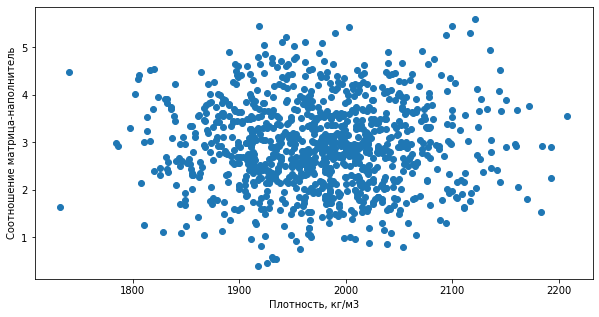

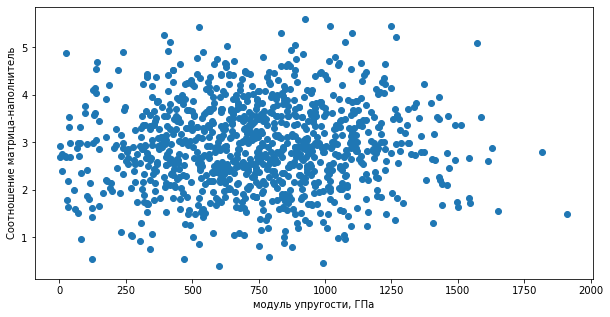

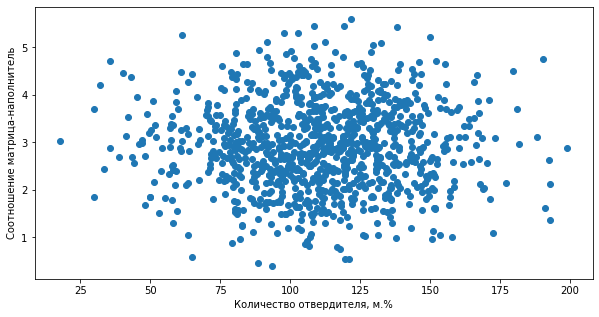

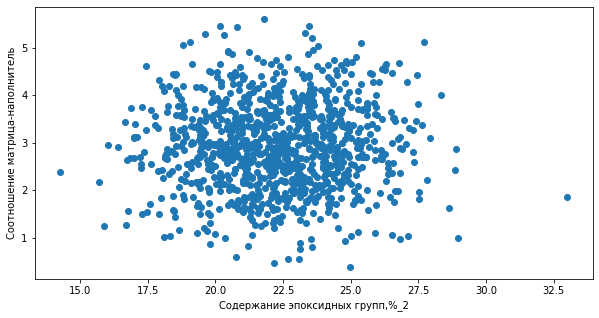

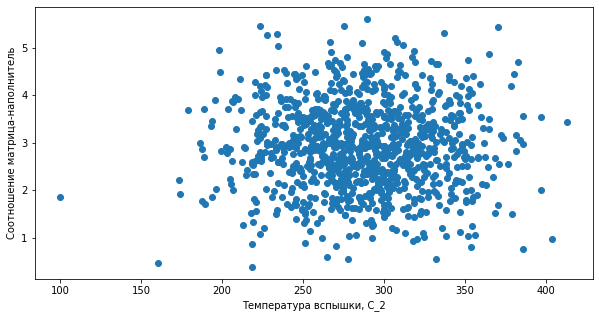

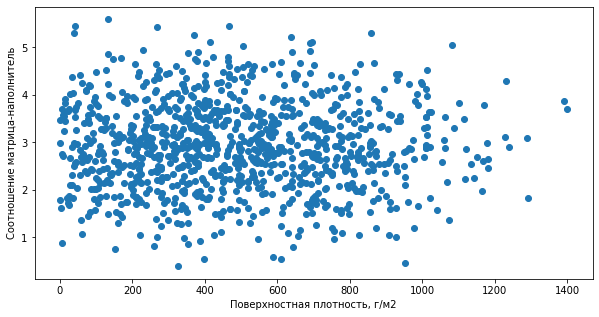

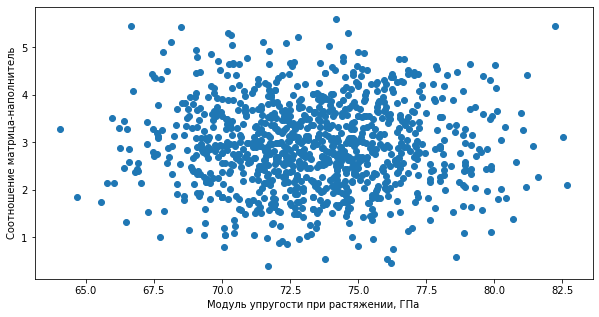

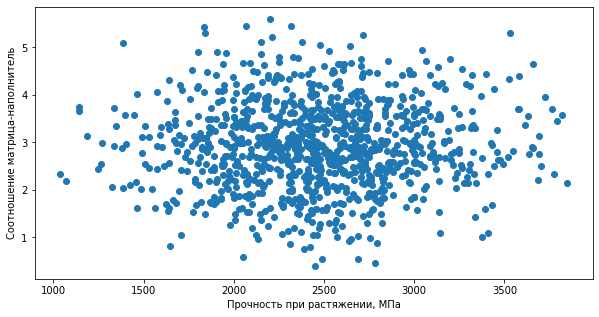

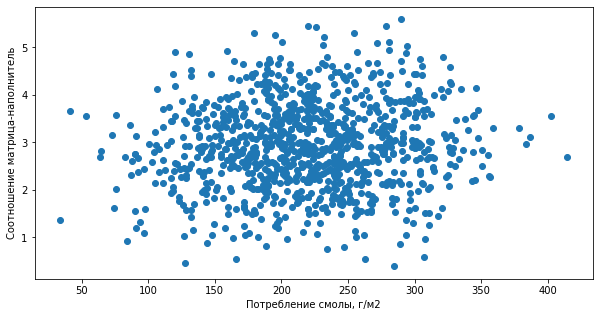

In [17]:
#@title Графики точек рассеяния по одному целевому значению
for i in range(len(column_bp)):
    if column_bp[i] != 'Соотношение матрица-наполнитель':
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.scatter(x = df_bp[column_bp[i]], y = df_bp['Соотношение матрица-наполнитель'])
        plt.xlabel(column_bp[i])
        plt.ylabel('Соотношение матрица-наполнитель')
        plt.show()
    print('\n')

--------------------------------------------------------------------------------

## Предобработка dataframe df_nup созданного на основе X_nup.xlsx

In [18]:
#@title Посмотрим на df_nup
df_nup.head(1040)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

In [19]:
#@title Краткая сводка df_nup
df_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [20]:
#@title Создание описательной статистики df_nup
df_nup.describe().T

count       mean        std  min        25%        50%  \
Угол нашивки, град  1040.0  45.000000  45.021650  0.0   0.000000  45.000000   
Шаг нашивки         1040.0   6.911385   2.555181  0.0   5.102256   6.938000   
Плотность нашивки   1040.0  57.248399  12.332438  0.0  49.970740  57.413594   

                          75%         max  
Угол нашивки, град  90.000000   90.000000  
Шаг нашивки          8.587662   14.440522  
Плотность нашивки   65.107235  103.988901

In [21]:
#@title Обнаружение пропущенных значений df_nup
df_nup.isna().sum()

Угол нашивки, град    0
Шаг нашивки           0
Плотность нашивки     0
dtype: int64

In [22]:
#@title Обнаружение дубликатов df_nup
duplicateRows_df_nup = df_nup[df_nup.duplicated()]
duplicateRows_df_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 0 entries
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  0 non-null      float64
 1   Шаг нашивки         0 non-null      float64
 2   Плотность нашивки   0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [23]:
#@title Количество различных элементов на указанной оси
df_nup.nunique(axis = 0)

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [24]:
#@title Среднее значение:
df_nup.mean()

Угол нашивки, град    45.000000
Шаг нашивки            6.911385
Плотность нашивки     57.248399
dtype: float64

In [25]:
#@title Медианное значение:
df_nup.median()

Угол нашивки, град    45.000000
Шаг нашивки            6.938000
Плотность нашивки     57.413594
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf8a97d90>,
      dtype=object)

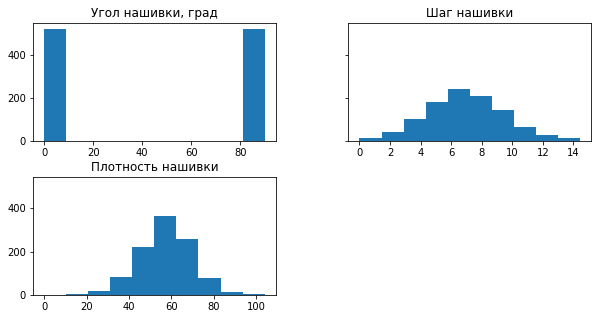

In [26]:
#@title Гистограммы по каждому значению df_nup
df_nup.hist(column = None, grid = False, sharey = True, figsize = (10, 5), layout = None, bins = 10)

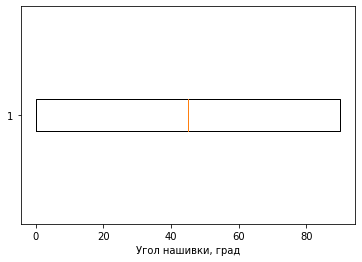

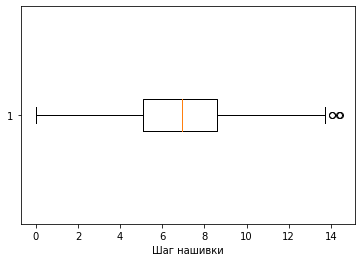

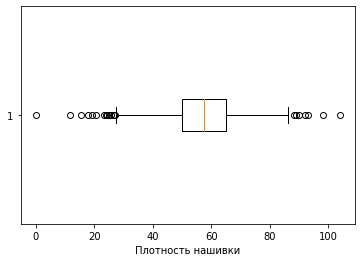

In [27]:
#@title Ящики с усами
for i in range(len(column_nup)):
    plt.boxplot(df_nup[column_nup[i]], vert = False)
    plt.xlabel(column_nup[i])
    plt.show()
    print('\n')

--------------------------------------------------------------------------------

## Объединяем наборы данных в один

In [28]:
#@title Объединение по индексу тип объединения INNER
df_comb = df_bp.join(df_nup, how='inner')

In [29]:
#@title Проверяем размерность df_comb
df_comb.shape

(1023, 13)

In [30]:
#@title Посмотрим на df_comb
df_comb.head(1023)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [31]:
column_comb = df_comb.columns.values.tolist()

In [32]:
#@title Краткая сводка df_comb
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [33]:
#@title Создание описательной статистики df_comb
df_comb.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [34]:
#@title Обнаружение пропущенных значений df_comb
df_comb.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [35]:
#@title Обнаружение дубликатов df_comb
duplicateRows_comb = df_comb[df_comb.duplicated()]
duplicateRows_comb.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 0 entries
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       0 non-null      float64
 1   Плотность, кг/м3                      0 non-null      float64
 2   модуль упругости, ГПа                 0 non-null      float64
 3   Количество отвердителя, м.%           0 non-null      float64
 4   Содержание эпоксидных групп,%_2       0 non-null      float64
 5   Температура вспышки, С_2              0 non-null      float64
 6   Поверхностная плотность, г/м2         0 non-null      float64
 7   Модуль упругости при растяжении, ГПа  0 non-null      float64
 8   Прочность при растяжении, МПа         0 non-null      float64
 9   Потребление смолы, г/м2               0 non-null      float64
 10  Угол нашивки, град                    0 non-null      float64
 11  Шаг нашивки                  

In [36]:
#@title Количество различных элементов на указанной оси
df_comb.nunique(axis = 0)

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [37]:
#@title Среднее значение:
df_comb.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [38]:
#@title Медианное значение:
df_comb.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd13750d50>,
      dtype=object)

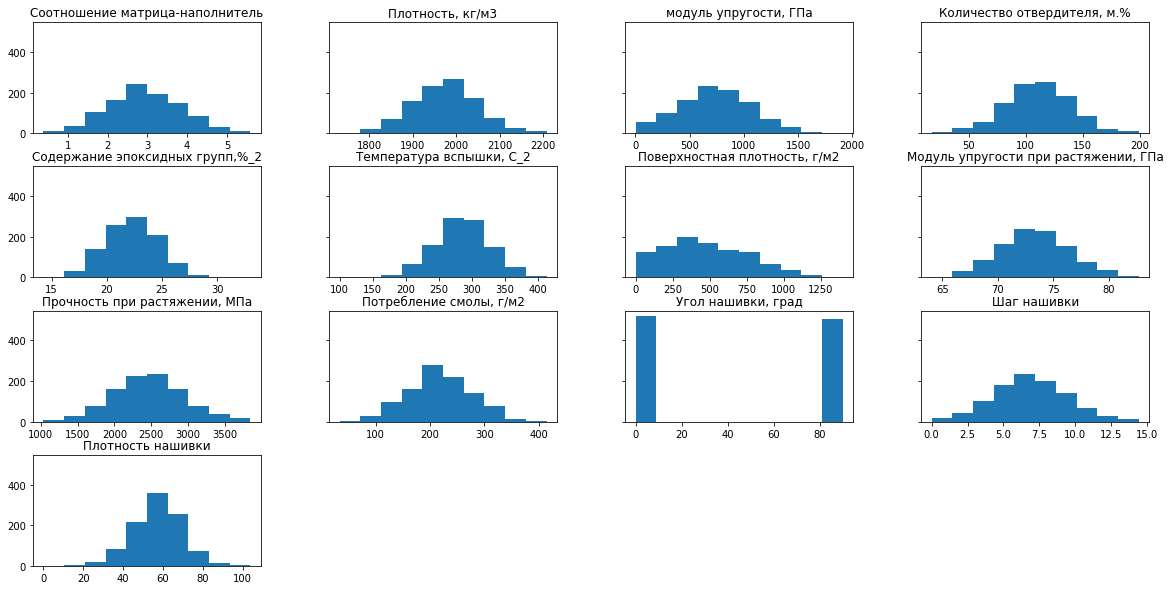

In [39]:
#@title Гистограммы по каждому значению df_comb
df_comb.hist(column = None, grid = False, sharey = True, figsize = (20, 10), layout = None, bins = 10)

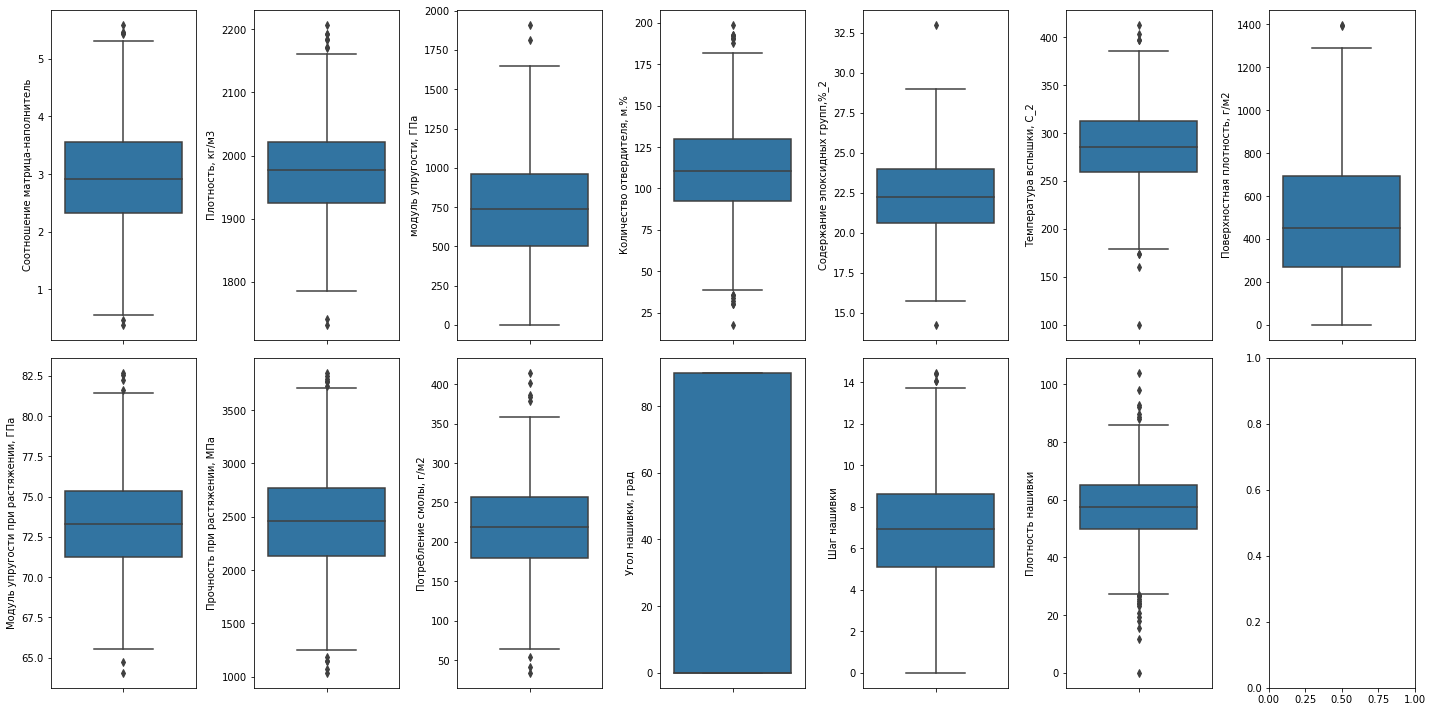

In [40]:
#@title Ящики с усами
fig, axs = plt.subplots(ncols = 7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, j in df_comb.items():
    sns.boxplot(data = df_comb, y = i, ax = axs[index])
    index += 1
plt.tight_layout(pad = 1.08, w_pad = 1.08)

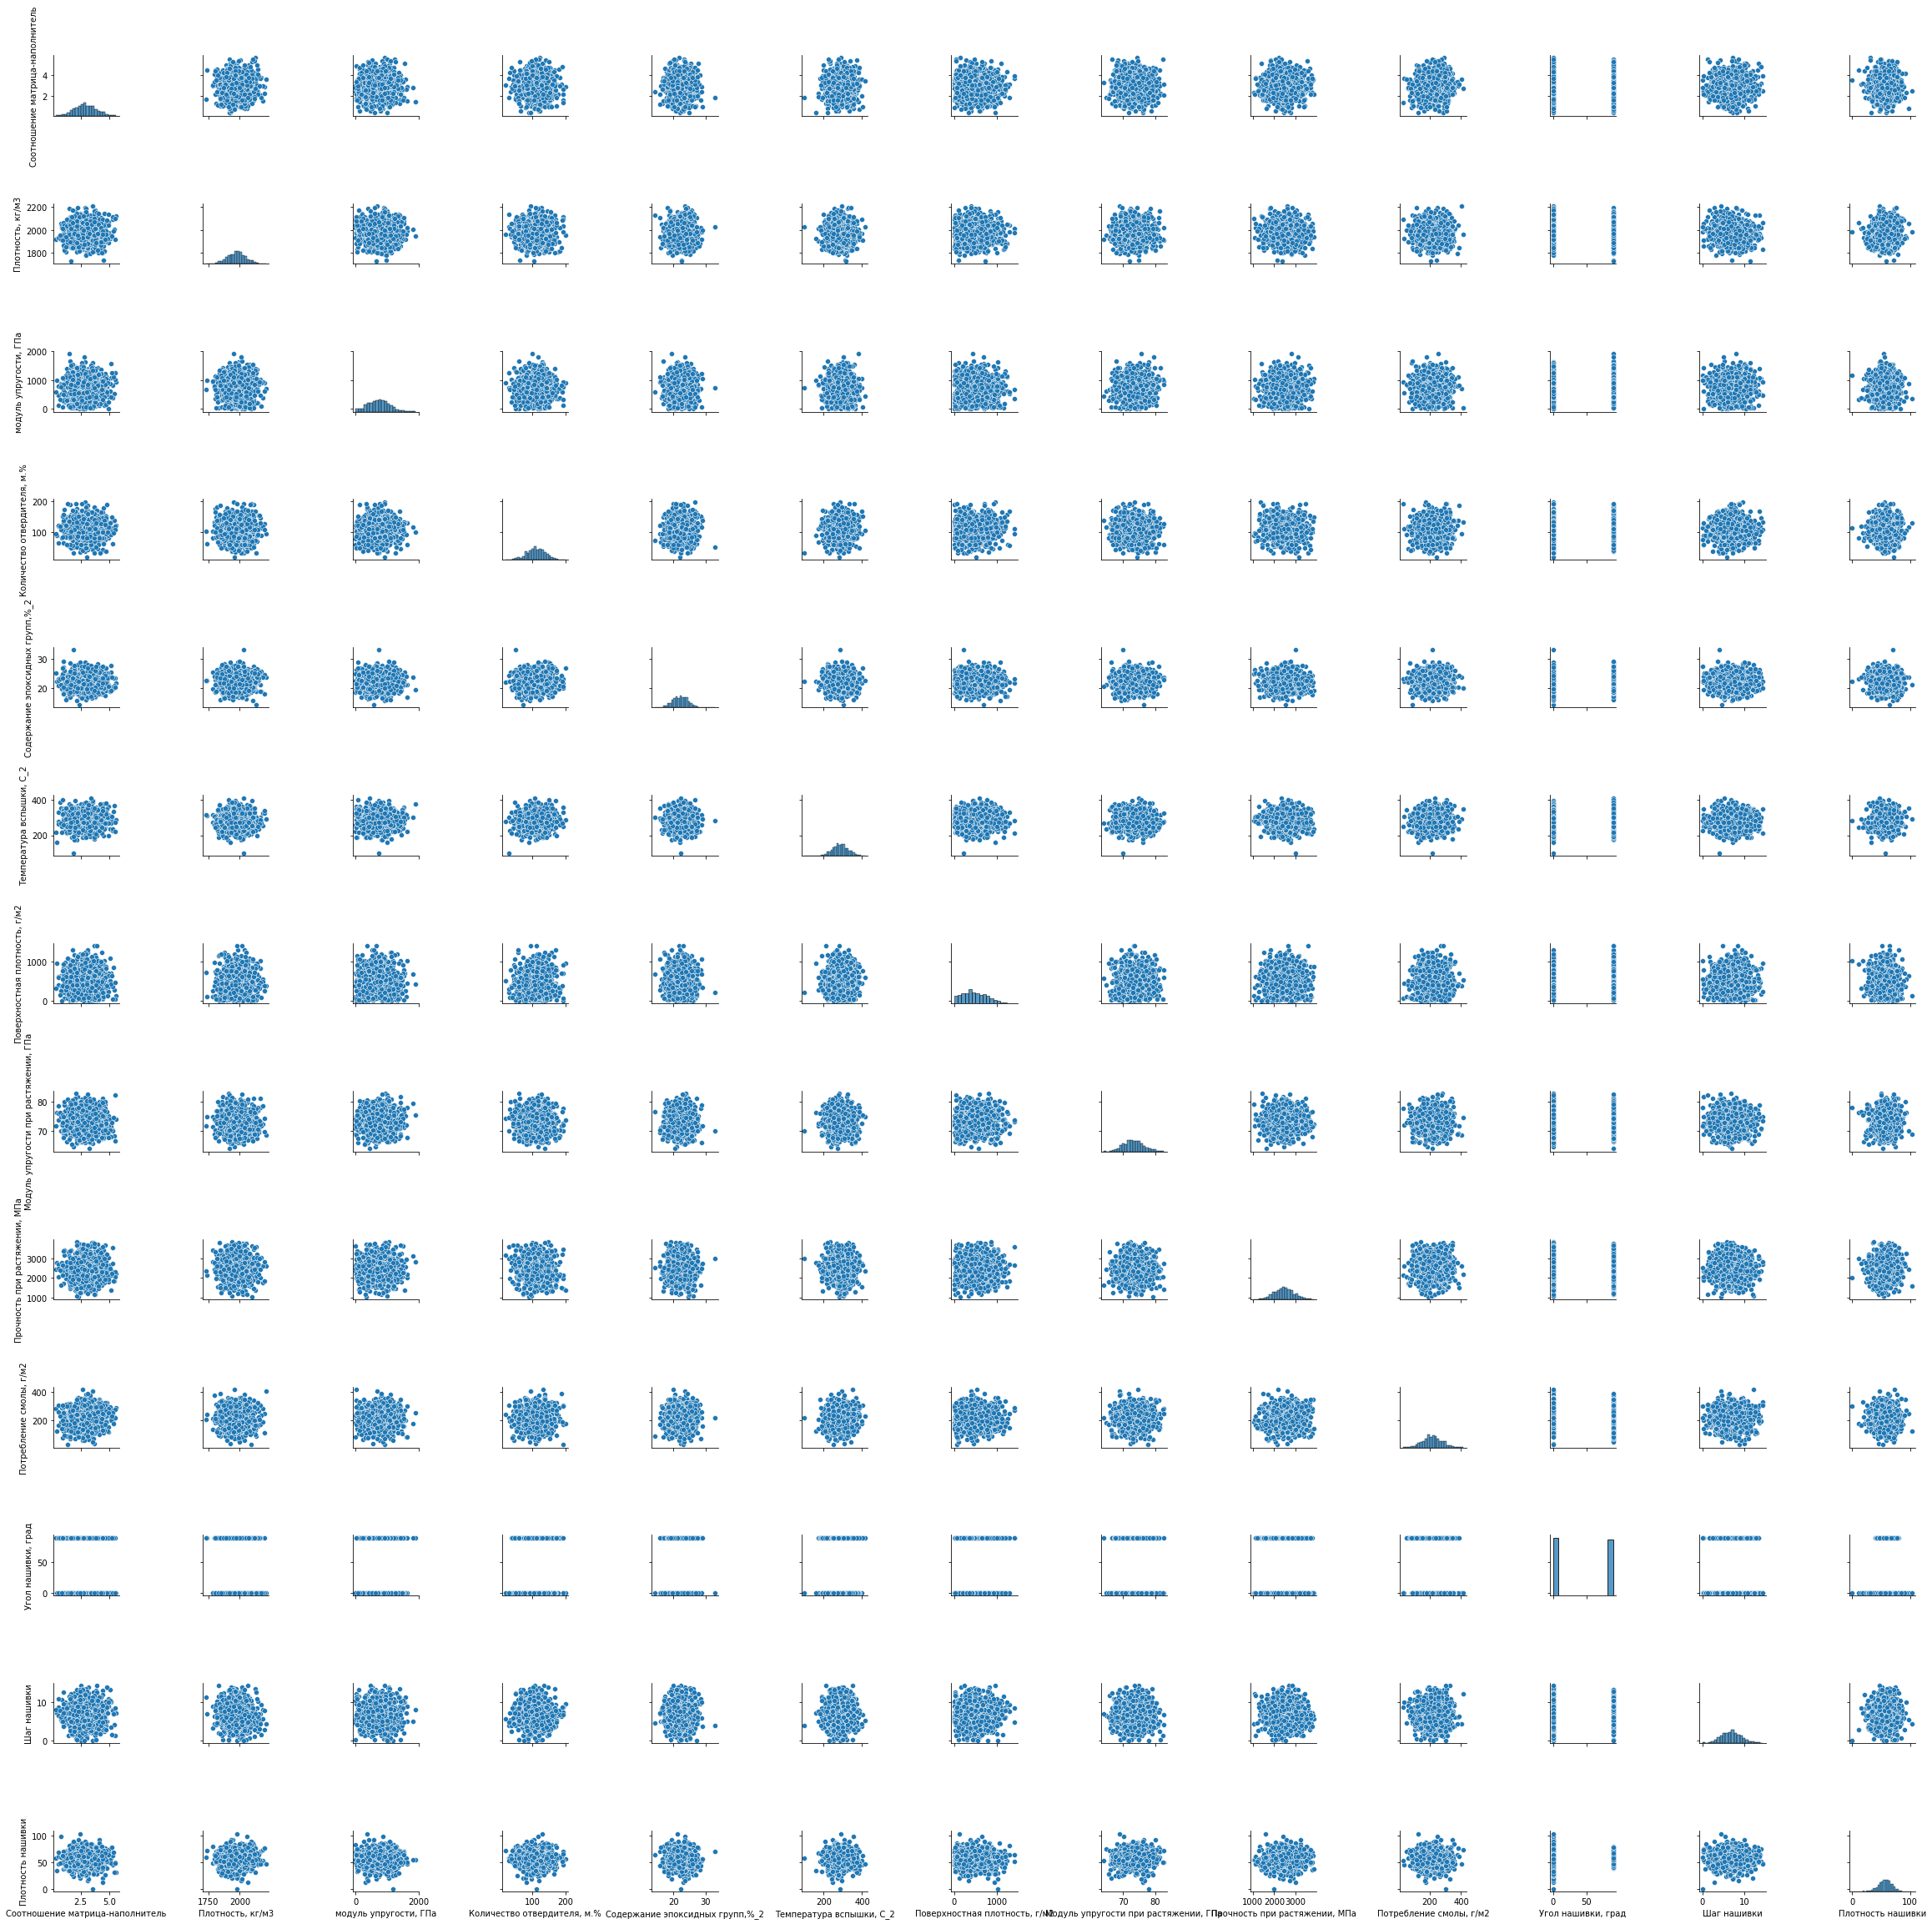

In [41]:
#@title Построим парные отношения в наборе данных
sns.pairplot(df_comb, hue = None, hue_order = None, palette = None,
             vars = None, x_vars=None,  y_vars=None, kind='scatter',
             diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False,
             dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

In [42]:
#@title Заголовки объединенного набора данных
column_comb

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки']

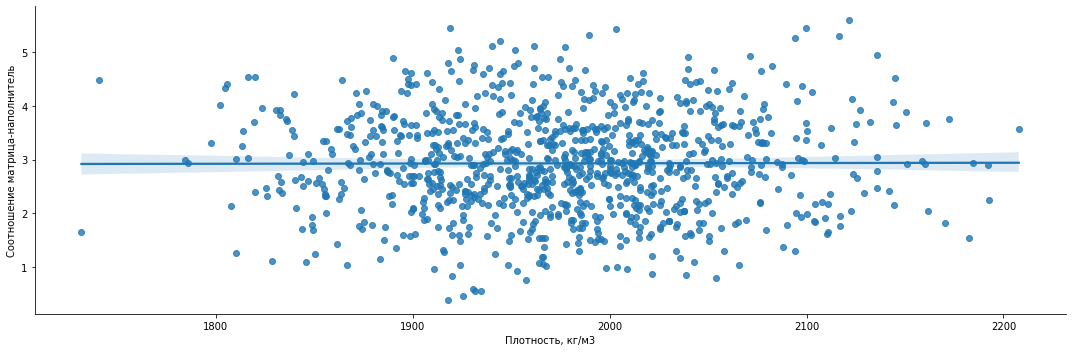

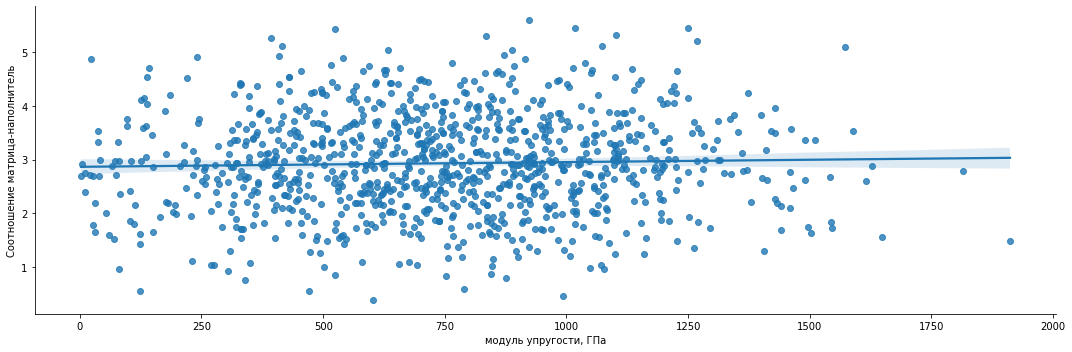

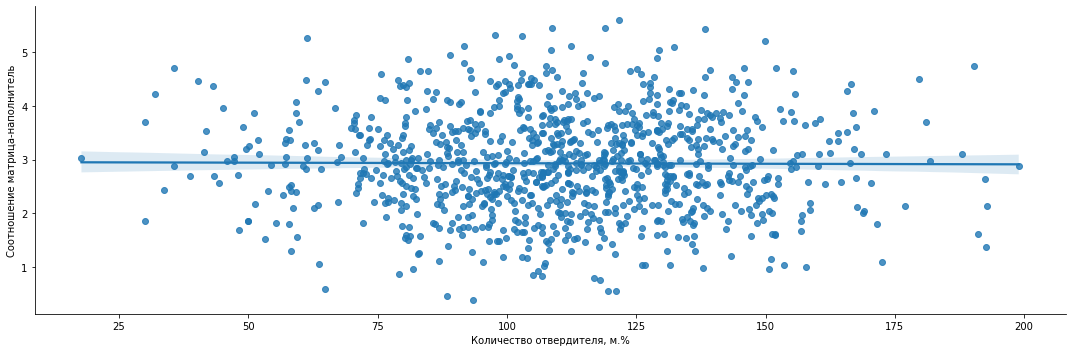

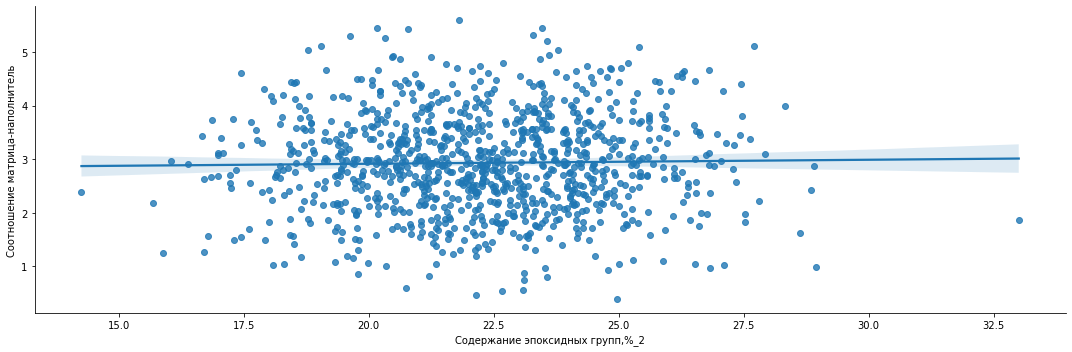

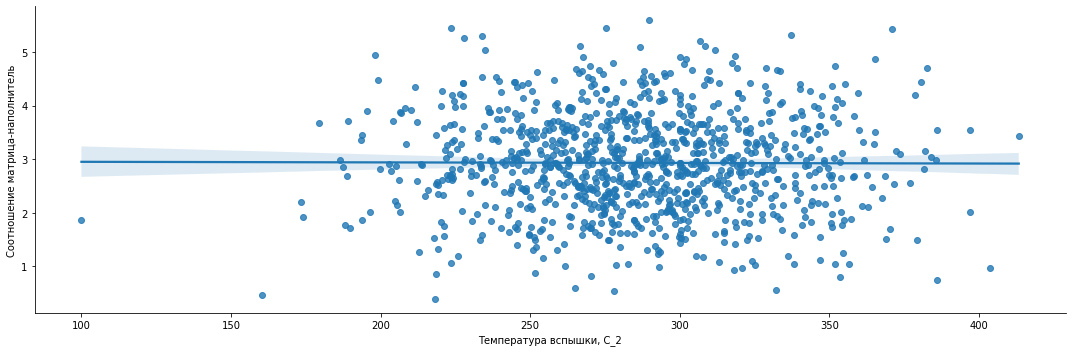

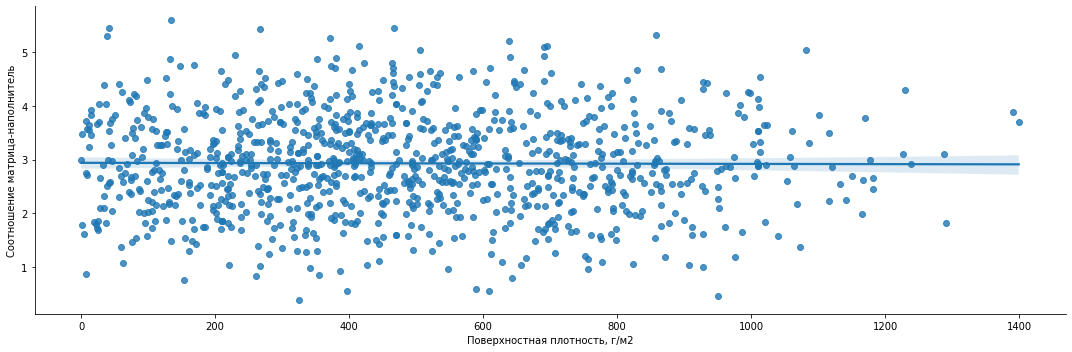

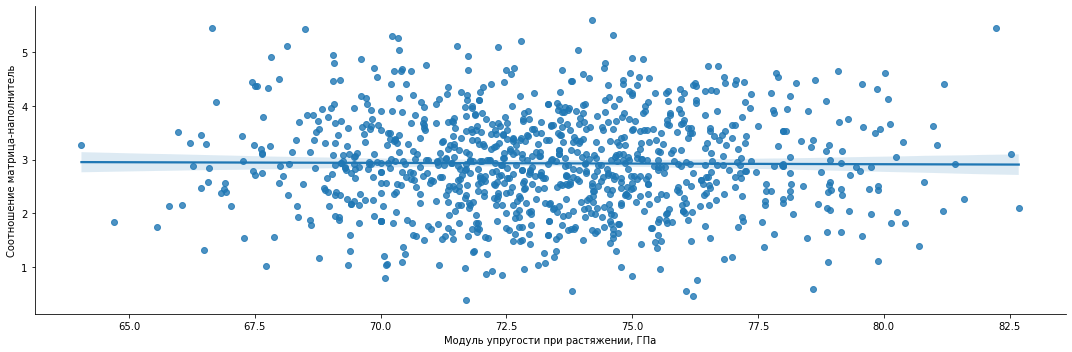

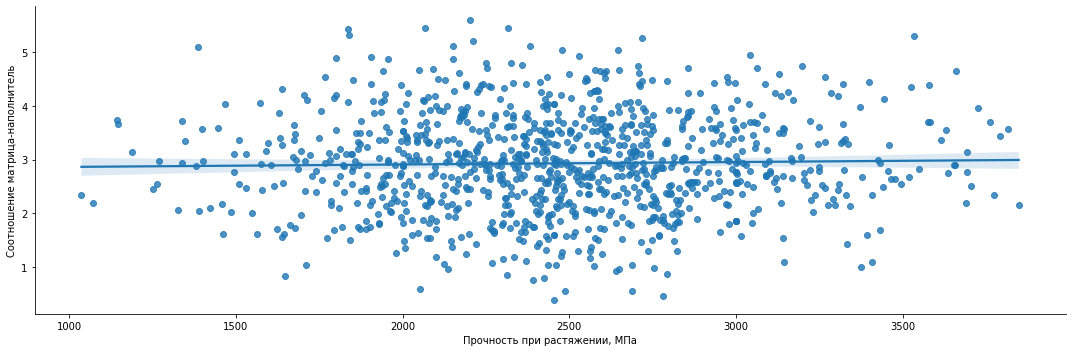

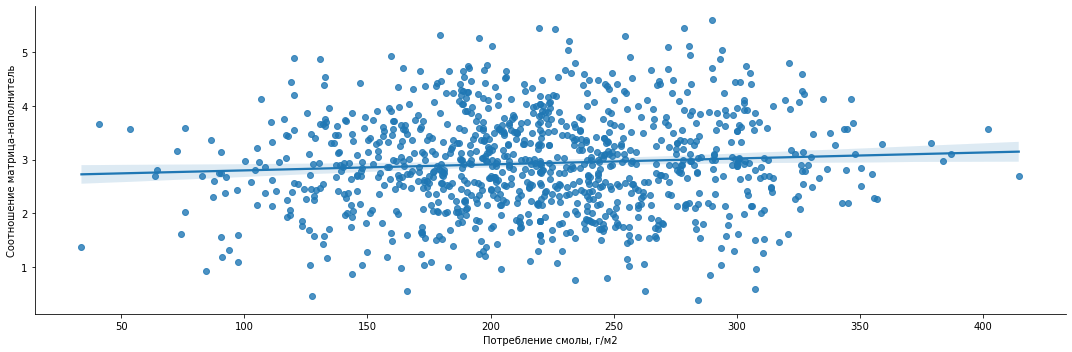

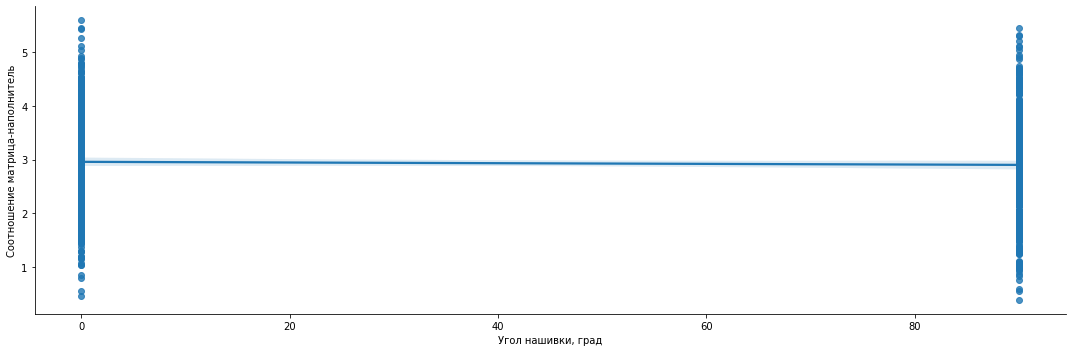

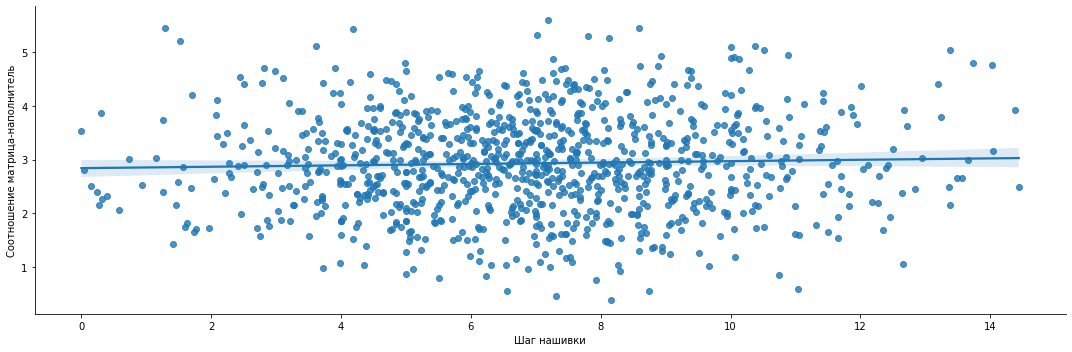

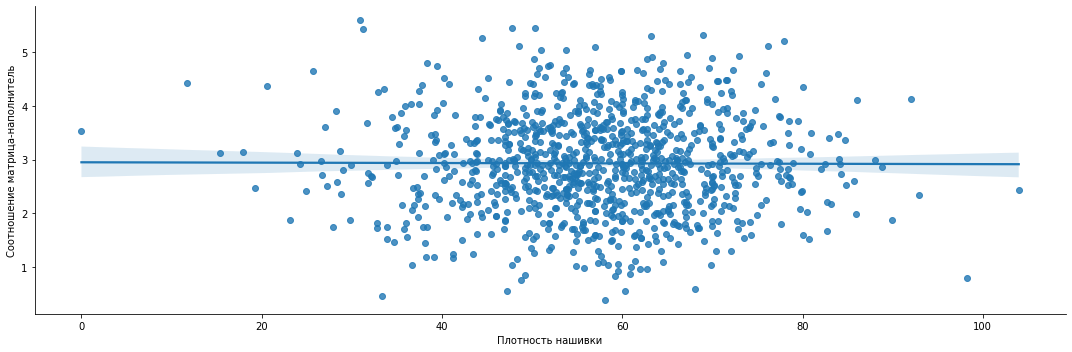

In [43]:
#@title Попарные графики рассеяния точек
for i in range(1, len(column_comb)):
    sns.lmplot(data = df_comb, x = column_comb[i], y = column_comb[0], aspect=3, height=5)
    plt.show()
    print('\n')

In [44]:
#@title Разобъем на квантили
for i, j in df_comb.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        per = np.shape(j_col)[0] * 100.0 / np.shape(df_comb)[0]
        print('В столбце "%s" кол-во выбросов = %.2f%%' % (i, per))

В столбце "Соотношение матрица-наполнитель" кол-во выбросов = 0.59%
В столбце "Плотность, кг/м3" кол-во выбросов = 0.88%
В столбце "модуль упругости, ГПа" кол-во выбросов = 0.20%
В столбце "Количество отвердителя, м.%" кол-во выбросов = 1.37%
В столбце "Содержание эпоксидных групп,%_2" кол-во выбросов = 0.20%
В столбце "Температура вспышки, С_2" кол-во выбросов = 0.78%
В столбце "Поверхностная плотность, г/м2" кол-во выбросов = 0.20%
В столбце "Модуль упругости при растяжении, ГПа" кол-во выбросов = 0.59%
В столбце "Прочность при растяжении, МПа" кол-во выбросов = 1.08%
В столбце "Потребление смолы, г/м2" кол-во выбросов = 0.78%
В столбце "Угол нашивки, град" кол-во выбросов = 0.00%
В столбце "Шаг нашивки" кол-во выбросов = 0.39%
В столбце "Плотность нашивки" кол-во выбросов = 2.05%


In [45]:
#@title Удаляем выбросы
df_comb = df_comb[~(df_comb['Плотность нашивки'] <= 35.0)]
df_comb = df_comb[~(df_comb['Плотность нашивки'] >= 85.0)]
df_comb = df_comb[~(df_comb['Количество отвердителя, м.%'] <= 40.0)]
df_comb = df_comb[~(df_comb['Количество отвердителя, м.%'] >= 180.0)]
print(np.shape(df_comb))

(954, 13)


In [46]:
#@title Повторно разобъем на квантили
for i, j in df_comb.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        per = np.shape(j_col)[0] * 100.0 / np.shape(df_comb)[0]
        print('В столбце "%s" кол-во выбросов = %.2f%%' % (i, per))

В столбце "Соотношение матрица-наполнитель" кол-во выбросов = 0.31%
В столбце "Плотность, кг/м3" кол-во выбросов = 0.94%
В столбце "модуль упругости, ГПа" кол-во выбросов = 0.31%
В столбце "Количество отвердителя, м.%" кол-во выбросов = 0.00%
В столбце "Содержание эпоксидных групп,%_2" кол-во выбросов = 0.21%
В столбце "Температура вспышки, С_2" кол-во выбросов = 0.63%
В столбце "Поверхностная плотность, г/м2" кол-во выбросов = 0.21%
В столбце "Модуль упругости при растяжении, ГПа" кол-во выбросов = 0.73%
В столбце "Прочность при растяжении, МПа" кол-во выбросов = 1.57%
В столбце "Потребление смолы, г/м2" кол-во выбросов = 0.63%
В столбце "Угол нашивки, град" кол-во выбросов = 0.00%
В столбце "Шаг нашивки" кол-во выбросов = 0.42%
В столбце "Плотность нашивки" кол-во выбросов = 0.00%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

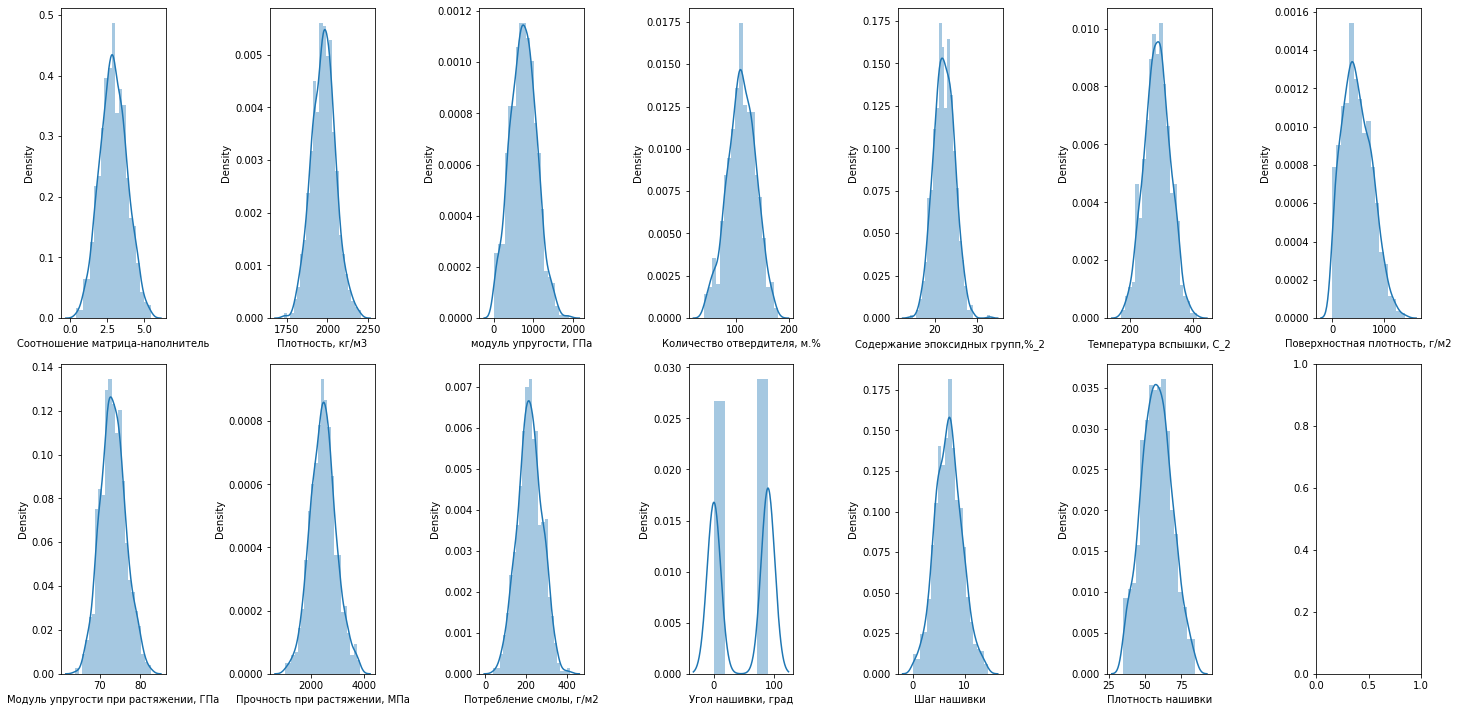

In [47]:
#@title Графики распределения
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))

index = 0
axs = axs.flatten()

for i, j in df_comb.items():
    sns.distplot(j, ax = axs[index])
    index += 1

plt.tight_layout(pad = 1.08, w_pad = 1.08)

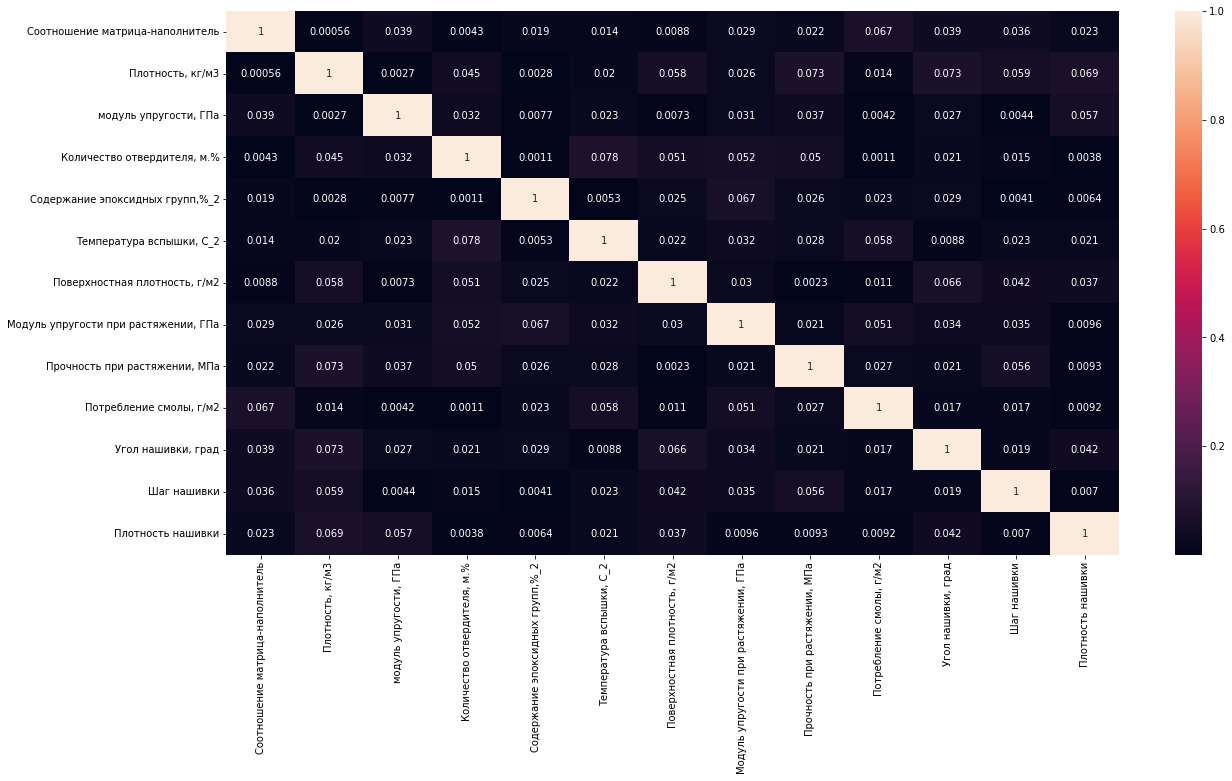

In [48]:
#@title Тепловая карта корреляции
plt.figure(figsize=(20, 10))
sns.heatmap(df_comb.corr().abs(), annot = True)

--------------------------------------------------------------------------------

## Нормализация

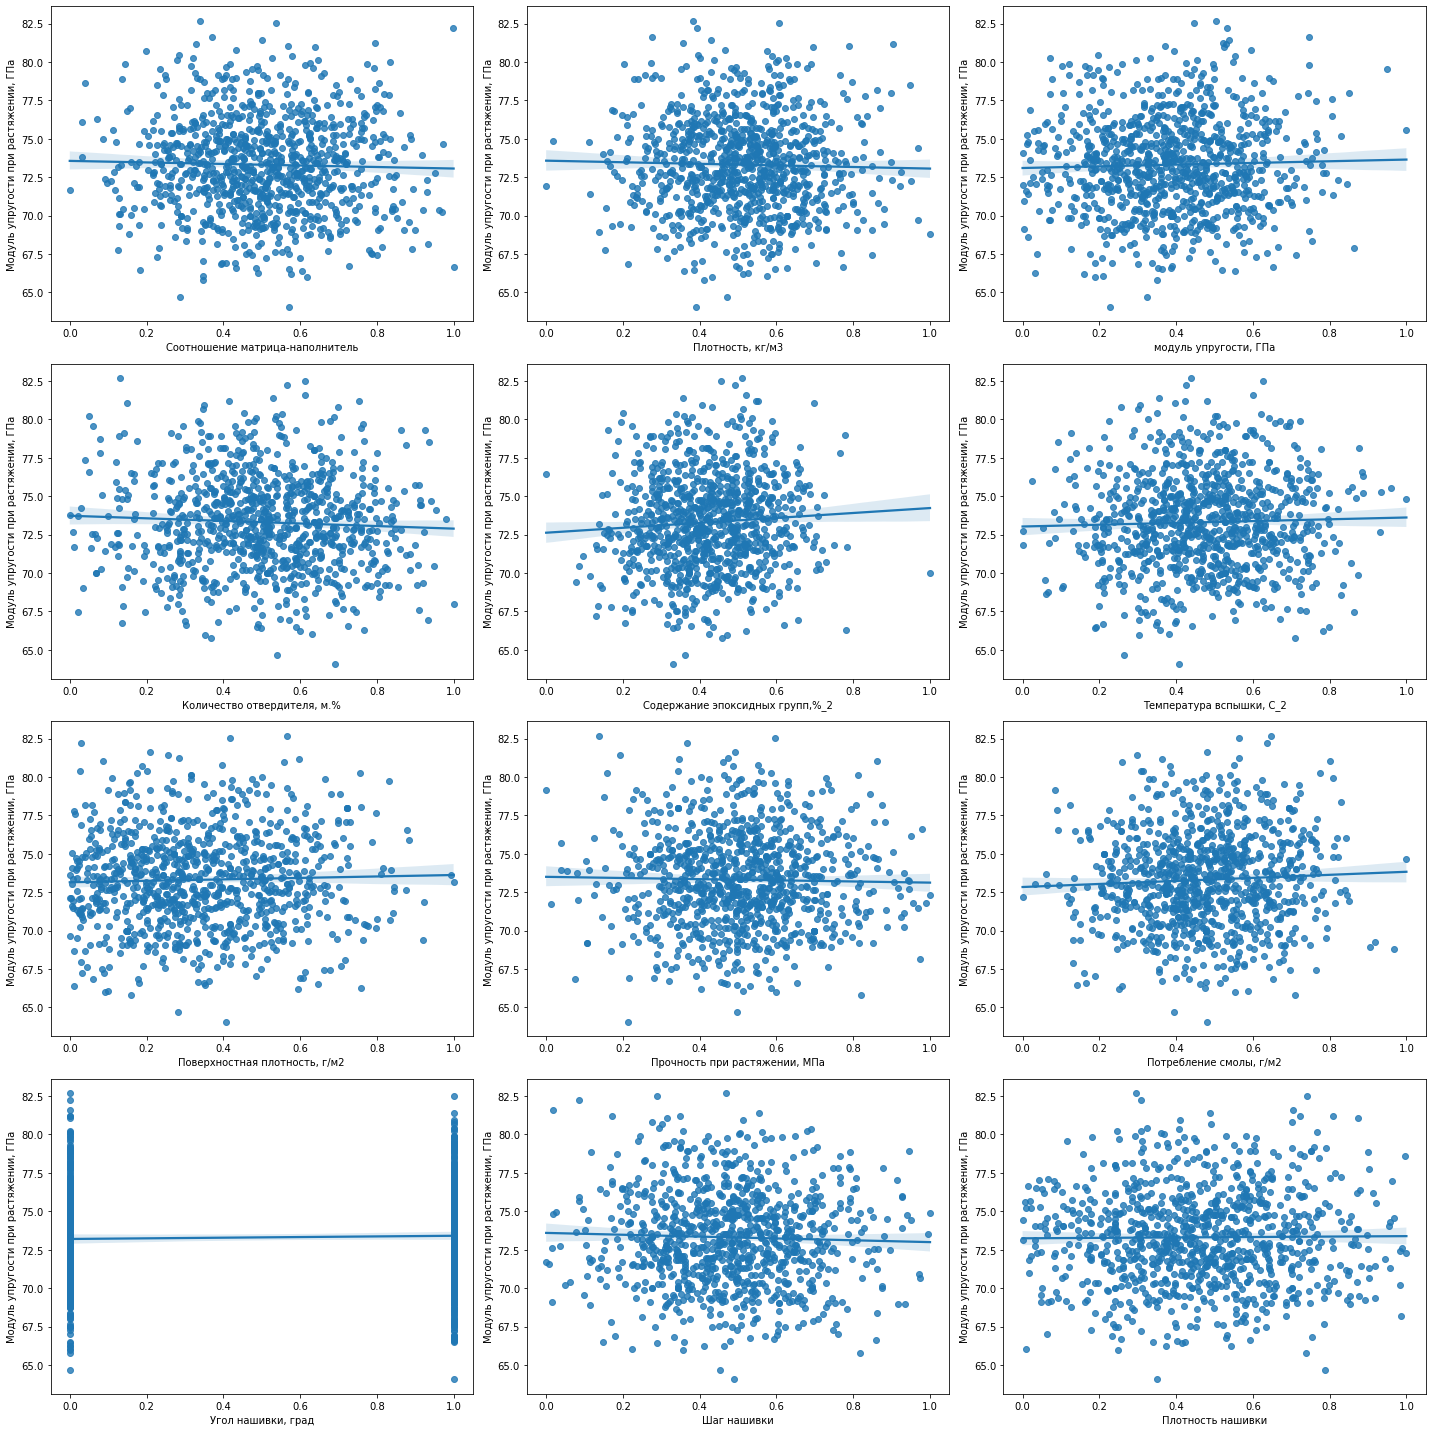

In [49]:
#@title Парные графики относительно - "Модуль упругости при растяжении, ГПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_elasticity = ['Соотношение матрица-наполнитель',
                        'Плотность, кг/м3',
                        'модуль упругости, ГПа',
                        'Количество отвердителя, м.%',
                        'Содержание эпоксидных групп,%_2',
                        'Температура вспышки, С_2',
                        'Поверхностная плотность, г/м2',
                        'Прочность при растяжении, МПа',
                        'Потребление смолы, г/м2',
                        'Угол нашивки, град',
                        'Шаг нашивки',
                        'Плотность нашивки']

df_x = df_comb.loc[:, X_without_elasticity]
df_y = df_comb['Модуль упругости при растяжении, ГПа']

df_x_elasticity = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_elasticity)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_elasticity):
    sns.regplot(x = df_x_elasticity[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

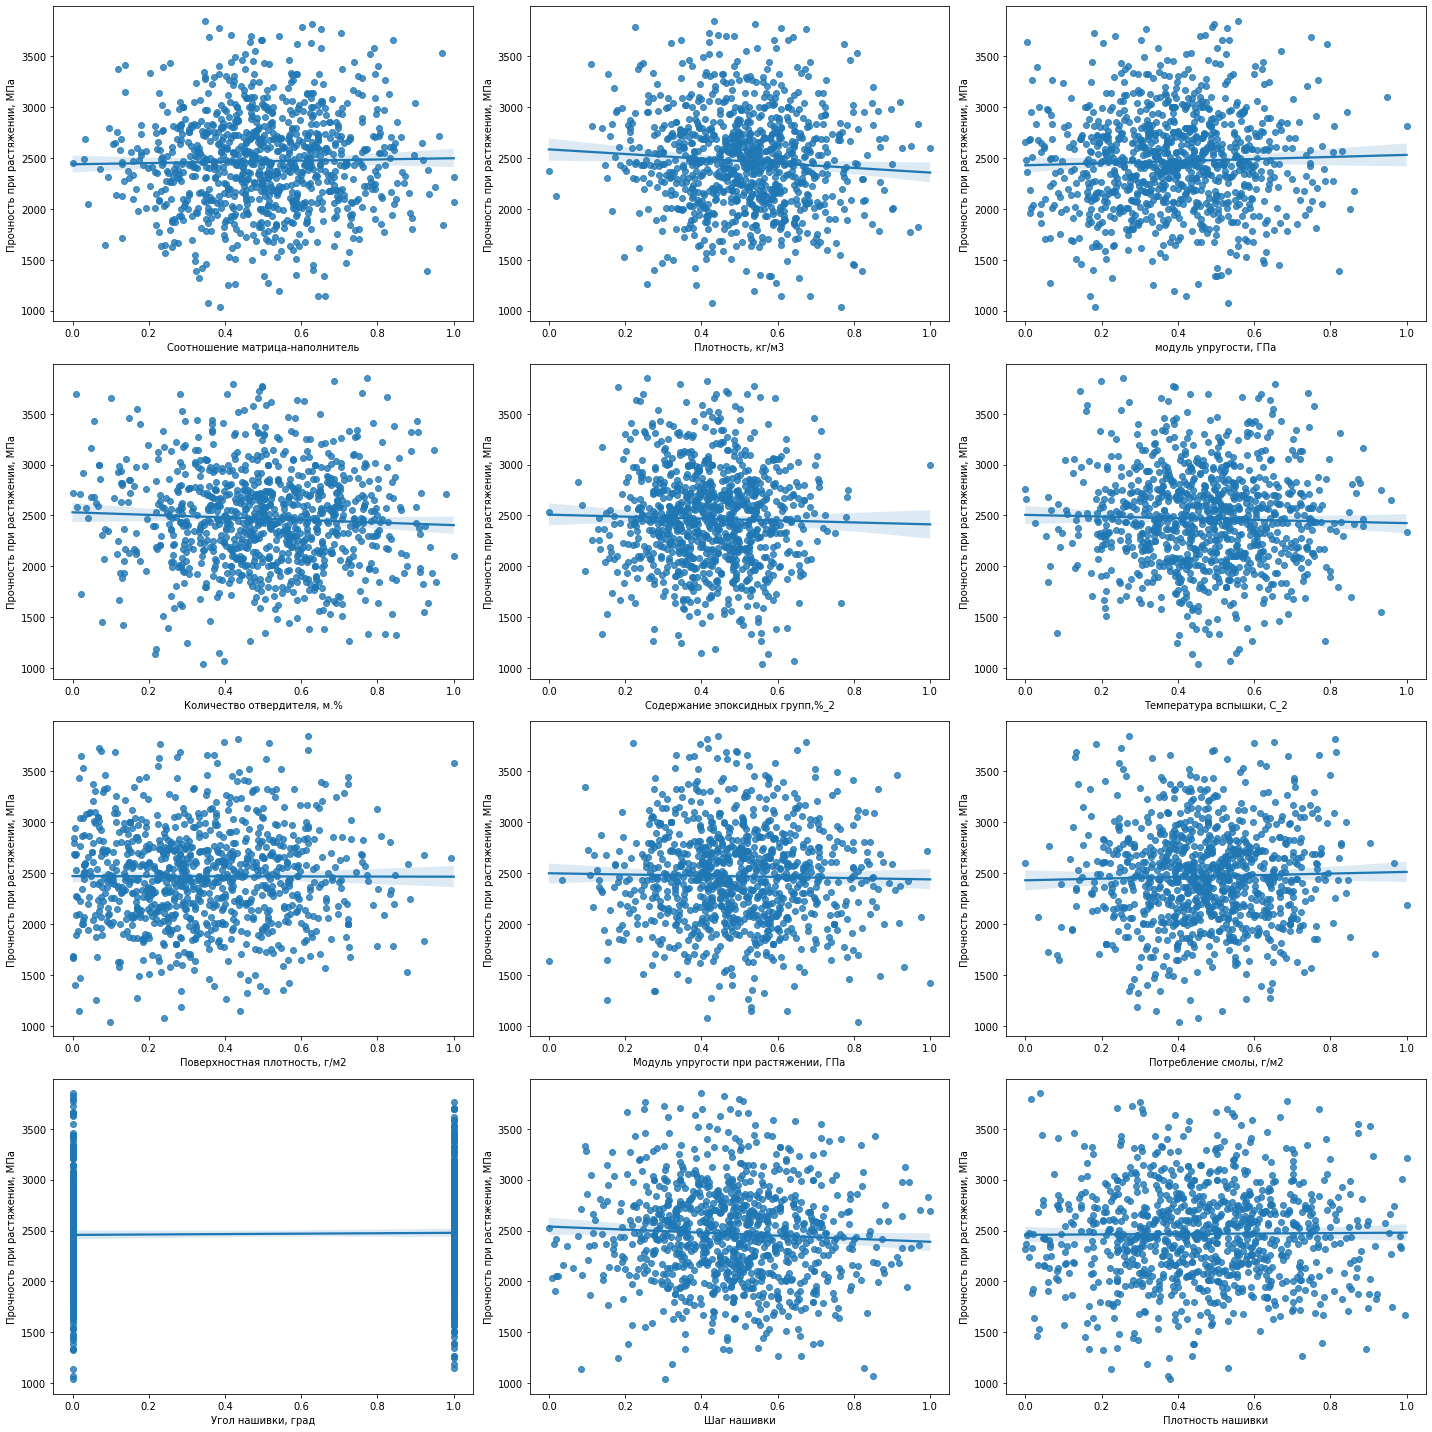

In [50]:
#@title Парные графики относительно - "Прочность при растяжении, МПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_strength = ['Соотношение матрица-наполнитель',
                      'Плотность, кг/м3',
                      'модуль упругости, ГПа',
                      'Количество отвердителя, м.%',
                      'Содержание эпоксидных групп,%_2',
                      'Температура вспышки, С_2',
                      'Поверхностная плотность, г/м2',
                      'Модуль упругости при растяжении, ГПа',
                      'Потребление смолы, г/м2',
                      'Угол нашивки, град',
                      'Шаг нашивки',
                      'Плотность нашивки']

df_x = df_comb.loc[:, X_without_strength]
df_y = df_comb['Прочность при растяжении, МПа']

df_x_strength = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_strength)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_strength):
    sns.regplot(x = df_x_strength[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

--------------------------------------------------------------------------------

## Обучим алгоритм машинного обучения

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df_comb.drop('Модуль упругости при растяжении, ГПа', axis = 1))
y = np.array(df_comb['Модуль упругости при растяжении, ГПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (667, 12) y_train: (667, 1)
X_test: (287, 12) y_test: (287, 1)


In [52]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min          max         mean         std
0      0.389403     5.455566     2.930646    0.904203
1   1731.764635  2207.773481  1975.747669   73.820992
2      2.436909  1911.536477   743.484597  330.231615
3     40.304806   179.645962   110.688614   26.781546
4     14.254985    33.000000    22.208086    2.421878
5    173.484920   413.273418   286.559313   40.450441
6      0.603740  1399.542362   481.074070  278.814346
7   1036.856605  3848.436732  2467.771681  481.224022
8     41.048278   414.590628   218.328594   59.498348
9      0.000000    90.000000    46.792453   44.987872
10     0.037639    14.440522     6.917423    2.572487
11    35.005121    84.840888    58.059589   10.465658

In [53]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min       max      mean       std
0   0.031998  1.000000  0.511649  0.178232
1   0.000000  1.000000  0.511588  0.150454
2   0.000000  0.949887  0.380974  0.169298
3   0.000000  1.000000  0.508512  0.192401
4   0.076869  1.000000  0.422408  0.127801
5   0.002039  1.000000  0.474946  0.168028
6   0.000000  1.000000  0.348806  0.200183
7   0.037827  0.988915  0.508761  0.168124
8   0.000000  1.000000  0.474165  0.159320
9   0.000000  1.000000  0.509745  0.500280
10  0.007457  1.000000  0.476217  0.178511
11  0.000000  1.000000  0.456480  0.213423

In [54]:
print(type(X_train))

<class 'numpy.ndarray'>


In [55]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.13611537981321162
MSE:  0.028749923014853542
RMSE:  0.16955802256116795


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.13607514793820405
MSE:  0.028727223681800616
RMSE:  0.16949107257257126


PolyRidge
MAE:  0.14590332364389555
MSE:  0.03328278308202356
RMSE:  0.18243569574516813


In [56]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.15220429653228898
MSE:  0.03612349354476507
RMSE:  0.19006181506227143


In [57]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.20878324327111134
MSE:  0.06834179825425968
RMSE:  0.26142264296395534


In [58]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boosting ...
MAE:  0.1370348132617115
MSE:  0.03045076905986956
RMSE:  0.17450148727122516


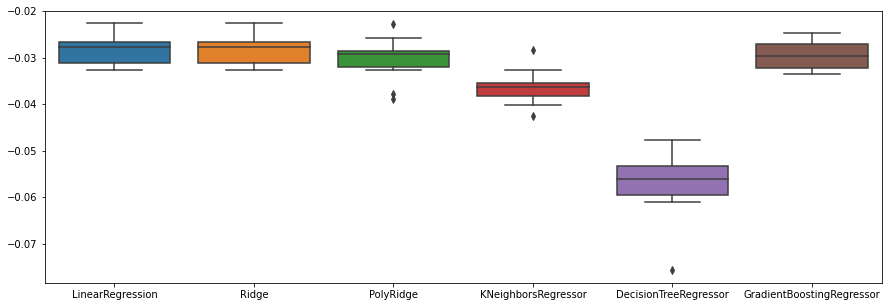

In [59]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

In [60]:
scores_map.style.highlight_max(axis = 0)

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df_comb.drop('Прочность при растяжении, МПа', axis = 1))
y = np.array(df_comb['Прочность при растяжении, МПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (667, 12) y_train: (667, 1)
X_test: (287, 12) y_test: (287, 1)


In [62]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min          max         mean         std
0      0.389403     5.455566     2.930646    0.904203
1   1731.764635  2207.773481  1975.747669   73.820992
2      2.436909  1911.536477   743.484597  330.231615
3     40.304806   179.645962   110.688614   26.781546
4     14.254985    33.000000    22.208086    2.421878
5    173.484920   413.273418   286.559313   40.450441
6      0.603740  1399.542362   481.074070  278.814346
7     64.054061    82.682051    73.308383    3.100480
8     41.048278   414.590628   218.328594   59.498348
9      0.000000    90.000000    46.792453   44.987872
10     0.037639    14.440522     6.917423    2.572487
11    35.005121    84.840888    58.059589   10.465658

In [63]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min       max      mean       std
0   0.000000  1.000000  0.499369  0.180304
1   0.000000  1.000000  0.506377  0.154399
2   0.000000  1.000000  0.386614  0.176540
3   0.011350  1.000000  0.505785  0.193732
4   0.095705  0.784214  0.421235  0.127618
5   0.000000  0.959879  0.470022  0.168367
6   0.000000  1.000000  0.340202  0.200394
7   0.000000  1.000000  0.492527  0.167115
8   0.000000  1.000000  0.472476  0.159294
9   0.000000  1.000000  0.509745  0.500280
10  0.007457  1.000000  0.473458  0.182778
11  0.000000  1.000000  0.466346  0.215760

In [64]:
print(type(X_train))

<class 'numpy.ndarray'>


In [65]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.1421386192168182
MSE:  0.03267502996491239
RMSE:  0.18076235771009513


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.1418870210631848
MSE:  0.03257599822284108
RMSE:  0.18048822183965657


PolyRidge
MAE:  0.1431673661481817
MSE:  0.03322678473374874
RMSE:  0.182282156926422


In [66]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.15313455462062056
MSE:  0.03893902797451777
RMSE:  0.19732974427216435


In [67]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.19255148948090794
MSE:  0.05654221195437373
RMSE:  0.2377860634149397


In [68]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boosting ...
MAE:  0.14155454209189783
MSE:  0.032611138133806186
RMSE:  0.18058554242742186


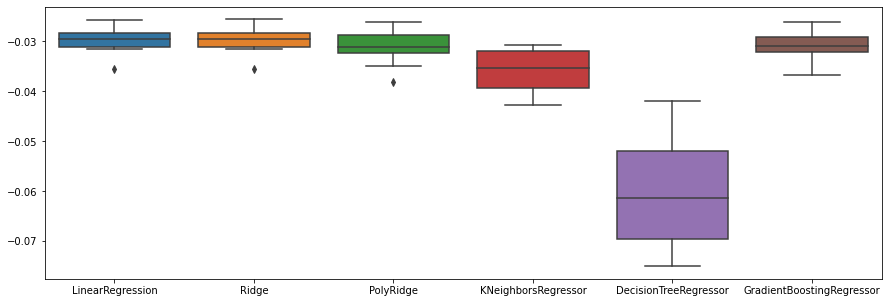

In [69]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

In [70]:
scores_map.style.highlight_max(axis = 0)

--------------------------------------------------------------------------------

In [71]:
#@title Нейронная сеть, которая рекомендует соотношение матрица-наполнитель
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras import utils
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.layers import Dropout


from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

print(f'tensorflow ver: {tf.__version__}')

tensorflow ver: 2.9.2


In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df_comb.drop('Соотношение матрица-наполнитель', axis = 1))
y = np.array(df_comb['Соотношение матрица-наполнитель'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

In [73]:
print(X_scaled.shape, y_scaled.shape)
print(X_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(954, 12) (954, 1)
(667, 12) (667, 1)
(287, 1) (287, 1)


In [74]:
#@title Ф-ия собирающая НС
def construct_model():
    return tf.keras.Sequential([
    keras.layers.Input(shape=(12,)),                   
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)                        
    ])

In [75]:
def compile_model(model):
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.MeanAbsolutePercentageError(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [76]:
#@title Ф-ия для графика ошибки
def plot_loss(history):
    fig, axes = plt.subplots(figsize=(15, 5))
    axes.plot(history['root_mean_squared_error'], label='loss')
    axes.plot(history['val_root_mean_squared_error'], label='val_loss')
    axes.set_xlabel('Эпоха')
    axes.set_ylabel('RMSE')
    axes.legend()
    axes.grid(True)
    plt.show()

In [77]:
#@title Сборка НС
model = construct_model()

In [78]:
#@title Компиляция НС
model = compile_model(model)

In [79]:
#@title Сводная информация по архитектуре сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

In [80]:
%%time
#Обучение нейросети
history = model.fit(X_train, y_train, epochs = 30,
                    validation_split = 0.3, verbose = 1)

Epoch 1/30
15/15 [==============================] - 2s 18ms/step - loss: 64.0207 - root_mean_squared_error: 0.3801 - val_loss: 36.8064 - val_root_mean_squared_error: 0.1841
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 44.3908 - root_mean_squared_error: 0.2435 - val_loss: 41.2224 - val_root_mean_squared_error: 0.2603
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 41.5349 - root_mean_squared_error: 0.2077 - val_loss: 37.0354 - val_root_mean_squared_error: 0.2303
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 40.3365 - root_mean_squared_error: 0.2189 - val_loss: 35.1884 - val_root_mean_squared_error: 0.2119
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 39.8300 - root_mean_squared_error: 0.2059 - val_loss: 38.7191 - val_root_mean_squared_error: 0.2433
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 41.0832 - root_mean_squared_error: 0.2200 - val_loss: 35.0824 - val

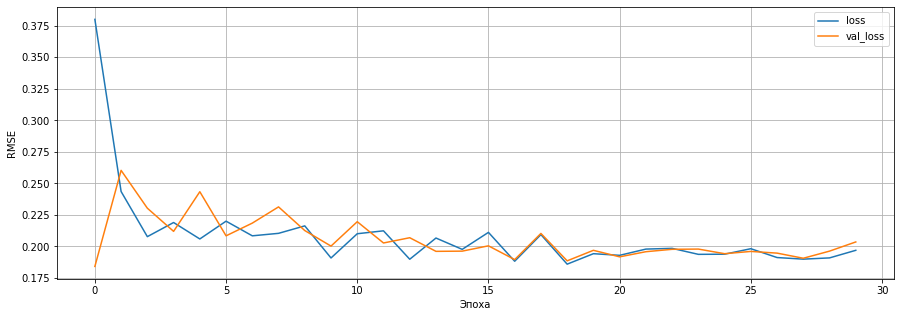

In [81]:
plot_loss(history.history)

In [82]:
# Проверяем точность нейросети на тестовых данных
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1296715.1250 - root_mean_squared_error: 0.2285


[1296715.125, 0.2284914255142212]

In [83]:
# Предсказание 
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


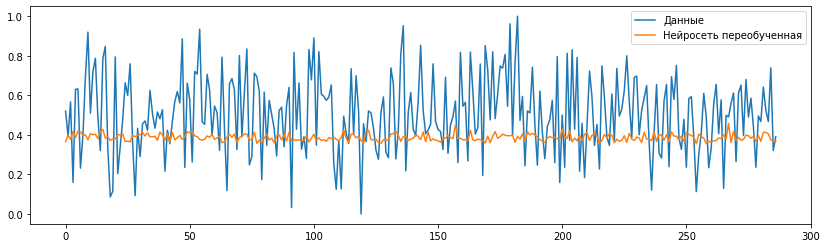

In [84]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_pred, label='Нейросеть переобученная')
ax.legend()
plt.show()

In [85]:
#@title Сохраняем модель
pickle.dump(model, open('model.pkl', 'wb'))

!ls

model.pkl  sample_data	X_bp.xlsx  X_nup.xlsx
